# Datasets

In [128]:
from pymatgen.core.composition import *
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import ase.db

In [129]:
df_atoms = pd.read_csv('./../data/raw/Schleder2019_AtomicTable.csv')
df_atoms.head(10)

,Element,Z,Electronegativity,IonizationPotential,ElectronAffinity,HOMO,LUMO,r_s_orbital,r_p_orbital,r_d_orbital,r_atomic_nonbonded,r_valence_lastorbital,r_covalent,Valence,PeriodicColumn,PeriodicColumn_upto18,NumberUnfilledOrbitals,Polarizability
0,H,1,2.20,-12.6833,-1.5273,-6.4925,0.7250,0.3865,NaN,NaN,0.37,0.3865,0.31,1.0,1.0,1.0,1.0,4.507107
1,He,2,NaN,-26.7499,3.0204,-15.7610,1.5714,0.2964,1.0292,0.4176,0.32,0.2964,0.28,2.0,8.0,18.0,0.0,1.383746
2,Li,3,0.98,-5.3606,-0.5863,-2.8744,-0.9074,1.6578,1.8874,2.0869,1.34,1.6578,1.28,1.0,1.0,1.0,1.0,164.000000
3,Be,4,1.57,-9.5007,0.7972,-5.6097,-2.0104,1.0805,1.2128,1.9594,0.90,1.0805,0.96,2.0,2.0,2.0,0.0,37.710000
4,B,5,2.04,-8.1261,0.0312,-3.6067,2.4547,0.8025,0.8348,1.3619,0.82,0.8348,0.84,3.0,3.0,13.0,5.0,20.530000
5,C,6,2.55,-10.7409,-0.7107,-5.2854,3.7464,0.6418,0.6367,1.1355,0.77,0.6367,0.76,4.0,4.0,14.0,4.0,11.260000
6,N,7,3.04,-13.5656,-1.6769,-7.0898,4.1526,0.5361,0.5154,1.2140,0.75,0.5154,0.71,5.0,5.0,15.0,3.0,7.600000
7,O,8,3.44,-16.3060,-2.8171,-9.0305,4.2084,0.4608,0.4333,1.0750,0.73,0.4333,0.66,6.0,6.0,16.0,2.0,5.240000
8,F,9,3.98,-19.2531,-4.0848,-11.1140,1.7177,0.4044,0.3740,1.0655,0.71,0.3740,0.57,7.0,7.0,17.0,1.0,3.700000
9,Ne,10,NaN,-22.3492,5.0478,-13.3330,2.7416,0.3604,0.3292,1.9061,0.69,0.3292,0.58,8.0,8.0,18.0,0.0,2.670000


In [130]:
db = ase.db.connect('./../data/raw/c2db.db')

rows = [row for row in db.select() if row.get('is_magnetic') == False]

## A.1 Dataset AB2

In [131]:
data = []

for row in rows:
    try:
        comp = Composition(row.formula)
        comp_dict = comp.as_dict()
        elements = list(comp_dict.keys())
        amounts = list(comp_dict.values())

        if len(elements) == 2 and sorted(amounts) == [1, 2]:
            data.append([
                row.formula,
                row.get('gap'),
                elements[0],
                elements[1],
                row.get('layergroup') # Aqui nós estamos considerando layergroup como prototype
            ])
    except:
        pass

df_materials = pd.DataFrame(data, columns=['Material', 'Band gap', 'Atom1', 'Atom2', 'layergroup'])

In [132]:
df_materials.head(5)

,Material,Band gap,Atom1,Atom2,layergroup
0,MoS2,0.000000,Mo,S,p-4m2
1,MoS2,0.000000,Mo,S,p-3m1
2,MoS2,1.580389,Mo,S,p-6m2
3,IrI2,0.000000,Ir,I,p-3m1
4,IrI2,0.000000,Ir,I,p-4m2


In [133]:
metal = insulator = 0

for gap in df_materials['Band gap']:
    if (gap < 0.000001):
        metal += 1
    else:
        insulator += 1

print(f'Num. Metals : {metal}')
print(f'Num. Insulators : {insulator}')

Num. Metals : 502
Num. Insulators : 217


In [134]:
merge1 = pd.merge(df_materials, df_atoms, how='inner', left_on='Atom1', right_on='Element')
merge1.head()

,Material,Band gap,Atom1,Atom2,layergroup,Element,Z,Electronegativity,IonizationPotential,ElectronAffinity,...,r_p_orbital,r_d_orbital,r_atomic_nonbonded,r_valence_lastorbital,r_covalent,Valence,PeriodicColumn,PeriodicColumn_upto18,NumberUnfilledOrbitals,Polarizability
0,MoS2,0.000000,Mo,S,p-4m2,Mo,42,2.16,-6.8668,-1.5561,...,1.6626,0.7271,1.45,0.7271,1.54,6.0,6.0,6.0,6.0,86.0
1,MoS2,0.000000,Mo,S,p-3m1,Mo,42,2.16,-6.8668,-1.5561,...,1.6626,0.7271,1.45,0.7271,1.54,6.0,6.0,6.0,6.0,86.0
2,MoS2,1.580389,Mo,S,p-6m2,Mo,42,2.16,-6.8668,-1.5561,...,1.6626,0.7271,1.45,0.7271,1.54,6.0,6.0,6.0,6.0,86.0
3,IrI2,0.000000,Ir,I,p-3m1,Ir,77,2.20,-8.8201,-2.5410,...,1.4695,0.6939,1.37,0.6939,1.41,23.0,9.0,9.0,3.0,51.0
4,IrI2,0.000000,Ir,I,p-4m2,Ir,77,2.20,-8.8201,-2.5410,...,1.4695,0.6939,1.37,0.6939,1.41,23.0,9.0,9.0,3.0,51.0


In [135]:
merge2 = pd.merge(merge1, df_atoms, how='inner', left_on='Atom2', right_on='Element')
merge2.head()

,Material,Band gap,Atom1,Atom2,layergroup,Element_x,Z_x,Electronegativity_x,IonizationPotential_x,ElectronAffinity_x,...,r_p_orbital_y,r_d_orbital_y,r_atomic_nonbonded_y,r_valence_lastorbital_y,r_covalent_y,Valence_y,PeriodicColumn_y,PeriodicColumn_upto18_y,NumberUnfilledOrbitals_y,Polarizability_y
0,MoS2,0.000000,Mo,S,p-4m2,Mo,42,2.16,-6.8668,-1.5561,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
1,MoS2,0.000000,Mo,S,p-3m1,Mo,42,2.16,-6.8668,-1.5561,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
2,MoS2,1.580389,Mo,S,p-6m2,Mo,42,2.16,-6.8668,-1.5561,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
3,IrI2,0.000000,Ir,I,p-3m1,Ir,77,2.20,-8.8201,-2.5410,...,1.0749,0.4119,1.33,1.0749,1.39,17.0,7.0,17.0,1.0,34.60
4,IrI2,0.000000,Ir,I,p-4m2,Ir,77,2.20,-8.8201,-2.5410,...,1.0749,0.4119,1.33,1.0749,1.39,17.0,7.0,17.0,1.0,34.60


In [136]:
df = merge2

df.drop(columns=['Atom1', 'Atom2', 'Element_x', 'Element_y'], inplace=True)

In [137]:
df.head()

,Material,Band gap,layergroup,Z_x,Electronegativity_x,IonizationPotential_x,ElectronAffinity_x,HOMO_x,LUMO_x,r_s_orbital_x,...,r_p_orbital_y,r_d_orbital_y,r_atomic_nonbonded_y,r_valence_lastorbital_y,r_covalent_y,Valence_y,PeriodicColumn_y,PeriodicColumn_upto18_y,NumberUnfilledOrbitals_y,Polarizability_y
0,MoS2,0.000000,p-4m2,42,2.16,-6.8668,-1.5561,-4.3183,-0.1345,1.5418,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
1,MoS2,0.000000,p-3m1,42,2.16,-6.8668,-1.5561,-4.3183,-0.1345,1.5418,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
2,MoS2,1.580389,p-6m2,42,2.16,-6.8668,-1.5561,-4.3183,-0.1345,1.5418,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
3,IrI2,0.000000,p-3m1,77,2.20,-8.8201,-2.5410,-5.6901,0.5069,0.9966,...,1.0749,0.4119,1.33,1.0749,1.39,17.0,7.0,17.0,1.0,34.60
4,IrI2,0.000000,p-4m2,77,2.20,-8.8201,-2.5410,-5.6901,0.5069,0.9966,...,1.0749,0.4119,1.33,1.0749,1.39,17.0,7.0,17.0,1.0,34.60


In [138]:
df.to_csv('./../data/processed/AB2_prototype_atomic.csv')

In [139]:
df = df[df['Band gap'] != 0.00000000]
df.head()

,Material,Band gap,layergroup,Z_x,Electronegativity_x,IonizationPotential_x,ElectronAffinity_x,HOMO_x,LUMO_x,r_s_orbital_x,...,r_p_orbital_y,r_d_orbital_y,r_atomic_nonbonded_y,r_valence_lastorbital_y,r_covalent_y,Valence_y,PeriodicColumn_y,PeriodicColumn_upto18_y,NumberUnfilledOrbitals_y,Polarizability_y
2,MoS2,1.580389,p-6m2,42,2.16,-6.8668,-1.5561,-4.3183,-0.1345,1.5418,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
7,CrO2,0.415707,p-6m2,24,1.66,-7.3295,-0.7587,-4.4654,0.4900,1.4266,...,0.4333,1.0750,0.73,0.4333,0.66,6.0,6.0,16.0,2.0,5.24
9,ZrS2,0.964544,p-6m2,40,1.33,-6.6339,-0.0117,-3.6022,-0.5279,1.6694,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
10,ZrS2,1.927754,p-4m2,40,1.33,-6.6339,-0.0117,-3.6022,-0.5279,1.6694,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37
11,ZrS2,1.159195,p-3m1,40,1.33,-6.6339,-0.0117,-3.6022,-0.5279,1.6694,...,0.8493,1.3934,1.02,0.8493,1.05,6.0,6.0,16.0,2.0,19.37


In [140]:
df.to_csv('./../data/processed/AB2_prototype_atomic_insulators.csv')

## Dataset Geral

In [141]:
from ase.formula import Formula

lista = [list(Formula(row.formula).stoichiometry())[0] for row in rows]

In [142]:
# Impressão de estequiometrias específicas
for est in [
    'AB3C8', 'AB2C2D2E2F4F8', 'AB2', 'ABC3', 'AB2C3C4', 'A',
    'AB2C2D2', 'ABC', 'AB3E4', 'ABC2', 'AB2C2', 'AB2C3', 'AB2C3D4',
    'ABC4', 'AB2C2D3', 'ABC2', 'AB2C24D4E8', 'AB3', 'AB2B3', 'AB'
]:
    print(f'{est}: {lista.count(est)}')

AB3C8: 56
AB2C2D2E2F4F8: 0
AB2: 1066
ABC3: 323
AB2C3C4: 15
A: 22
AB2C2D2: 103
ABC: 1115
AB3E4: 0
ABC2: 226
AB2C2: 371
AB2C3: 46
AB2C3D4: 0
ABC4: 123
AB2C2D3: 20
ABC2: 226
AB2C24D4E8: 0
AB3: 281
AB2B3: 5
AB: 1030


In [143]:
# Conta as ocorrências
contagem = Counter(str(stoi) for stoi in lista)

In [144]:
# Define quais estequiometrias focar
principais = ['AB2', 'AB', 'ABC', 'AB3']
valores = [contagem.get(k, 0) for k in principais]

In [145]:
# Soma o restante
outros = sum(v for k, v in contagem.items() if k not in principais)
principais.append('outras')
valores.append(outros)

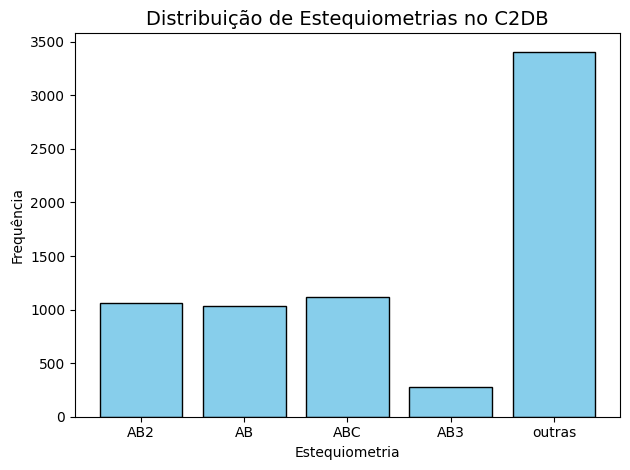

In [146]:
# Plot
plt.title('Distribuição de Estequiometrias no C2DB', fontsize=14)
plt.xlabel('Estequiometria')
plt.ylabel('Frequência')
plt.bar(principais, valores, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.savefig('./../figures/bar_stoichiometry_c2db.png', dpi=300)
plt.show()

In [147]:
df_atoms.set_index('Element', inplace=True)
dicio = df_atoms.to_dict('index')
# print(dicio)

In [148]:
prop = [
    'Z',
    'Electronegativity',
    'IonizationPotential',
    'ElectronAffinity',
    'HOMO',
    'LUMO',
    'r_s_orbital',
    'r_p_orbital',
    'r_d_orbital',
    'r_atomic_nonbonded',
    'r_valence_lastorbital',
    'r_covalent',
    'Valence',
    'PeriodicColumn',
    'PeriodicColumn_upto18',
    'NumberUnfilledOrbitals',
    'Polarizability'
]

In [149]:
lista = []

pesos = []

media_interm = {}

lista_completa = []

In [150]:
for row in rows:
    try:
        comp = Composition(row.formula).as_dict()
        elem = list(comp.items())

        media_interm['Material'] = row.formula

        media_interm['layergroup'] = row.get('layergroup')

        media_interm['Band gap'] = row.get('gap')

        for i in prop:
            for m in range(0, len(elem)):
                lista.append(dicio[elem[m][0]][i])
                pesos.append(elem[m][1])

            media_interm[f'media_{i}'] = np.mean(lista)

            avg = np.average(lista, weights=pesos)
            media_interm[f'media_pon_{i}'] = avg

            max_prop = max(lista)
            min_prop = min(lista)

            media_interm[f'max_{i}'] = max_prop
            media_interm[f'min_{i}'] = min_prop

            media_interm[f'desvio_{i}'] = np.std(lista)

            sum_prop = 0
            for j in lista:
                sub2 = (j - avg)**2
                sum_prop += sub2

            media_interm[f'desvio_pon_{i}'] = np.sqrt(sum_prop/len(lista))

            lista.clear()
            pesos.clear()
        
        lista_completa.append(media_interm.copy())

    except:
        pass

# lista_completa

In [151]:
df = pd.DataFrame(lista_completa)
df.head()

,Material,layergroup,Band gap,media_Z,media_pon_Z,max_Z,min_Z,desvio_Z,desvio_pon_Z,media_Electronegativity,...,max_NumberUnfilledOrbitals,min_NumberUnfilledOrbitals,desvio_NumberUnfilledOrbitals,desvio_pon_NumberUnfilledOrbitals,media_Polarizability,media_pon_Polarizability,max_Polarizability,min_Polarizability,desvio_Polarizability,desvio_pon_Polarizability
0,MoS2,p-4m2,0.000000,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
1,MoS2,p-3m1,0.000000,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
2,MoS2,p-6m2,1.580389,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
3,Mo2S4,p2_1/m11,0.051028,29.0,24.666667,42,16,13.0,13.703203,2.37,...,6.0,2.0,2.0,2.108185,52.685,41.58,86.0,19.37,33.315,35.117093
4,Co2S4,p2_1/m11,0.000000,21.5,19.666667,27,16,5.5,5.797509,2.23,...,3.0,2.0,0.5,0.527046,36.185,30.58,53.0,19.37,16.815,17.724566


In [152]:
n_metal = n_insulator = 0

for i in df['Band gap']:
    if i > 0.0000000001:
        n_insulator += 1
    else:
        n_metal += 1

print(f'N_metals : {n_metal}')
print(f'N_insulators : {n_insulator}')

N_metals : 2996
N_insulators : 3904


In [153]:
df.to_csv('./../data/processed/dataset_pbe_prototype_com_metais.csv')

In [154]:
df = df[df['Band gap'] != 0.00000000]

df.to_csv('./../data/processed/dataset_pbe_prototype_isolantes.csv')